**Description:**

This is the Jupyter notebook where we implemented a linear regression.

**Project Name:** Lending Club

**Team:** Silas Mederer, Jonas Bechthold

**Date:** 2020-10-02 to 2020-10-08

In [22]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("data/df_clean.csv")
df.drop("Unnamed: 0", inplace=True, axis=1)

# Split

In [23]:
categorical_var = list(df.select_dtypes('object').columns)
print("categorial var")
print(categorical_var)

categorial var
['grade', 'sub_grade', 'purpose', 'addr_state']


In [24]:
continuous_var = list(df.select_dtypes('int').columns) + list(df.select_dtypes('float').columns)
print("continues var")
print(continuous_var)

continues var
['term_is_36', 'emp_length', 'pub_rec_bankruptcies', 'default', 'loan_amnt', 'int_rate', 'annual_inc', 'dti', 'inq_last_6mths', 'open_acc', 'pub_rec', 'total_acc']


# Correlogram 

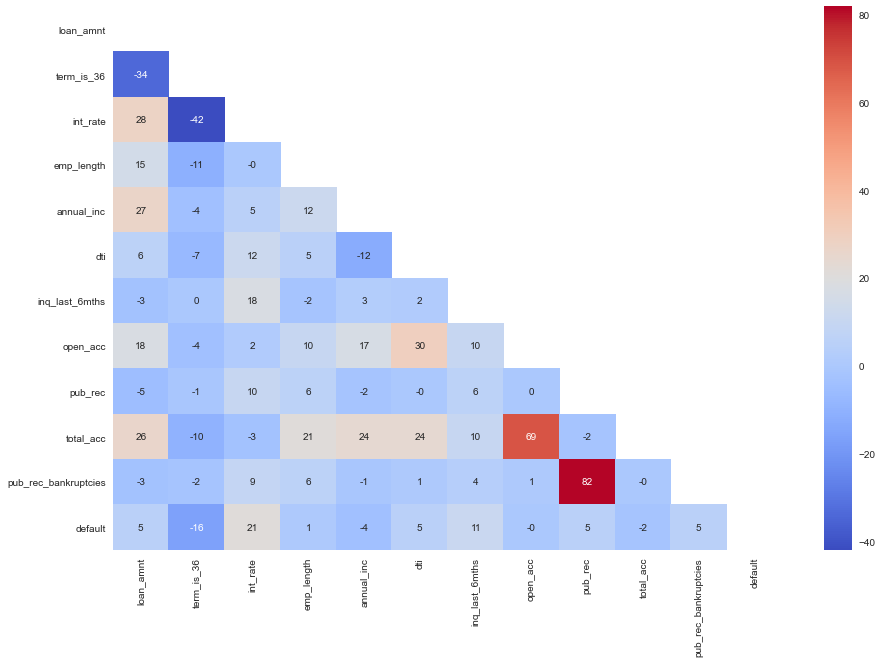

In [25]:
fig, ax = plt.subplots(figsize=(15,10))
mask = np.triu(df.corr())
ax = sns.heatmap(round(df.corr()*100,0)
                 ,annot=True
                 ,mask=mask
                 ,cmap="coolwarm")
plt.savefig('plots/correlogram.png')

# Scale

In [27]:
df.skew()

loan_amnt                1.078220
term_is_36              -1.208320
int_rate                 0.237159
emp_length               0.247783
annual_inc              29.323089
dti                     -0.030249
inq_last_6mths           3.430048
open_acc                 1.045713
pub_rec_bankruptcies     4.457929
default                  1.936162
dtype: float64

In [28]:
df["annual_inc"]=np.log(df.annual_inc)
df.skew()

loan_amnt               1.078220
term_is_36             -1.208320
int_rate                0.237159
emp_length              0.247783
annual_inc              0.118937
dti                    -0.030249
inq_last_6mths          3.430048
open_acc                1.045713
pub_rec_bankruptcies    4.457929
default                 1.936162
dtype: float64

<AxesSubplot:>

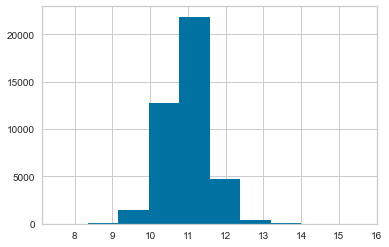

In [29]:
df.annual_inc.hist(bins=10)

# Get dummies

In [30]:
df.drop("grade", axis=1, inplace=True)
df.drop("sub_grade", axis=1, inplace=True)

In [31]:
y = df["int_rate"]
X = pd.get_dummies(df.copy(), drop_first=True)
X.drop("int_rate", axis=1, inplace=True)

y.head()

0    0.1065
1    0.1527
2    0.1596
3    0.1349
4    0.0790
Name: int_rate, dtype: float64

# Split

Text(0.5, 0, "['int_rate']")

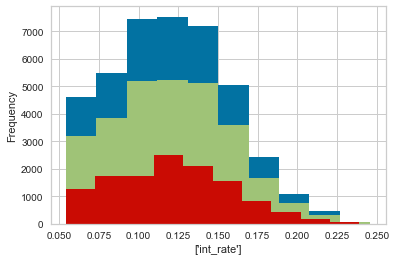

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# plot
y.plot.hist()
y_train.plot.hist()
y_test.plot.hist()
plt.xlabel(["int_rate"])

# Linear Regression

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)
y_pred_train = lin_reg.predict(X_train)

## Scores

In [34]:
print("Scores on test data")
print(f"RMSE: {round(mean_squared_error(y_test, y_pred)**0.5,3)}")
print(f"R2:  {round(r2_score(y_test, y_pred)*100,3)}%")

Scores on test data
RMSE: 0.031
R2:  28.58%


## Curves and graphs

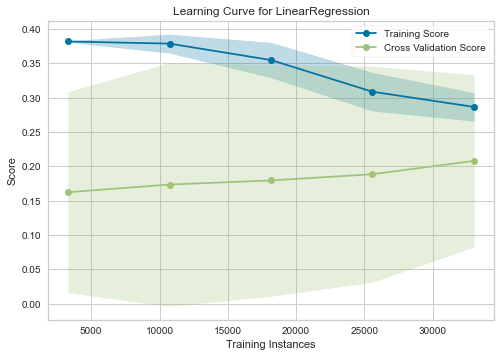

<AxesSubplot:title={'center':'Learning Curve for LinearRegression'}, xlabel='Training Instances', ylabel='Score'>

In [14]:
from yellowbrick.model_selection import LearningCurve

model = LinearRegression()
visualizer = LearningCurve(model, scoring='r2')

visualizer.fit(X, y)
visualizer.show()

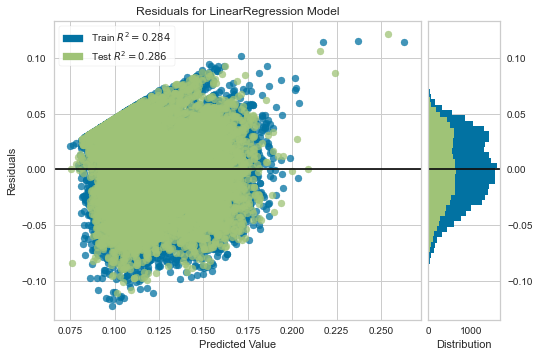

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [15]:
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(LinearRegression())
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

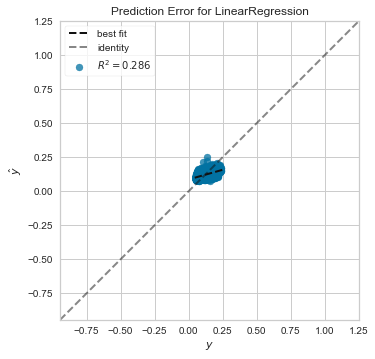

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [16]:
from yellowbrick.regressor import PredictionError

visualizer = PredictionError(LinearRegression())

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show() 

# Statsmodel OLS

In [17]:
import statsmodels.api as sms

# add constant important for this model
X_train = sms.add_constant(X_train)

model = sms.OLS(y_train, X_train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               int_rate   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     161.0
Date:                Tue, 06 Oct 2020   Prob (F-statistic):               0.00
Time:                        17:02:08   Log-Likelihood:                 59253.
No. Observations:               28904   AIC:                        -1.184e+05
Df Residuals:                   28832   BIC:                        -1.178e+05
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.1110      0.006     19.029      0.000       0.100       0.122
loan_amnt                   7.886e-07   3.13e-08     25.188      0.000    7.27e-07     8.5e-07
term_is_36                    -0.0304      0.000    -64.991      0.000      -0.031      -0.030
emp_length                    -0.0007   5.43e-05    -12.710      0.000      -0.001      -0.001
annual_inc                     0.0009      0.000      2.284      0.022       0.000       0.002
dti                            0.0005      3e-05     16.521      0.000       0.000       0.001
inq_last_6mths                 0.0044      0.000     35.101      0.000       0.004       0.005
open_acc                      -0.0005   4.55e-05    -10.660      0.000      -0.001      -0.000
pub_rec_bankruptcies           0.0127      0.001     13.979      0.000       0.011       0.014
default                        0.0113      0.001     21.329      0.000       0.010       0.012
purpose_credit_card            0.0109      0.001     10.019      0.000       0.009       0.013
purpose_debt_consolidation     0.0147      0.001     14.801      0.000       0.013       0.017
purpose_educational            0.0186      0.002      8.654      0.000       0.014       0.023
purpose_home_improvement       0.0060      0.001      5.162      0.000       0.004       0.008
purpose_house                  0.0091      0.002      4.321      0.000       0.005       0.013
purpose_major_purchase         0.0065      0.001      5.263      0.000       0.004       0.009
purpose_medical                0.0101      0.002      6.024      0.000       0.007       0.013
purpose_moving                 0.0113      0.002      6.394      0.000       0.008       0.015
purpose_other                  0.0138      0.001     12.547      0.000       0.012       0.016
purpose_renewable_energy       0.0101      0.004      2.581      0.010       0.002       0.018
purpose_small_business         0.0167      0.001     12.979      0.000       0.014       0.019
purpose_vacation               0.0069      0.002      3.234      0.001       0.003       0.011
purpose_wedding                0.0141      0.002      9.259      0.000       0.011       0.017
addr_state_AL                 -0.0063      0.004     -1.458      0.145      -0.015       0.002
addr_state_AR                 -0.0052      0.005     -1.129      0.259      -0.014       0.004
addr_state_AZ                 -0.0035      0.004     -0.857      0.392      -0.012       0.005
addr_state_CA                 -0.0022      0.004     -0.562      0.574      -0.010       0.006
addr_state_CO                 -0.0080      0.004     -1.943      0.052      -0.016    7.11e-05
addr_state_CT                 -0.0045      0.004     -1.081      0.280      -0.013       0.004
addr_state_DC                 -0.0023      